In [31]:
'''This script computes the period and mass distribution of exoplanets taking into account
that there exist a weak correlation between these parameters. Therefore, the distributions
are obtained using a beta and gamma distribution functions as mentioned in Ing-Guey Jian et al, 2007.
I still need to check the orange line in the histograms because apparently the scale factor is not ok.'''

#Standard python packages

import matplotlib.pyplot as plt
import numpy as np
import random 
from astropy import constants as c
from scipy.special import beta as beta_func
from scipy.special import gamma

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')
%matplotlib inline  

In [92]:
M = []
P = []
k = 0
#for i in range(1000):
while (k < 10000):  
    
    Alpha_m = random.gammavariate(0.5779, 1.0)
    Beta_m  = random.gammavariate(5.5115, 1.0)
    Alpha_p = random.gammavariate(0.2952, 1.0)
    Beta_p  = random.gammavariate(3.4484, 1.0)
    Delta_1 = random.gammavariate(0.0745, 1.0)
    Delta_2 = random.gammavariate(0.3961, 1.0)
    
    M1 = 155.5*(Alpha_m + Delta_1) / (Alpha_m + Delta_1 + Beta_m + Delta_2)
    P1 = 11650.0*(Alpha_p + Delta_1) / (Alpha_p + Delta_1 + Beta_p + Delta_2)
    
    if (M1 > 0.008 and M1 < 26.7) and (P1 > 0.8079 and P1 < 6776.1):
        M.append(M1)
        P.append(P1)
        k = k + 1
        
print(len(M), len(P)) 
#P = Distribution(y, 0.3697, 3.8445, 11650.0)

10000 10000


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in power


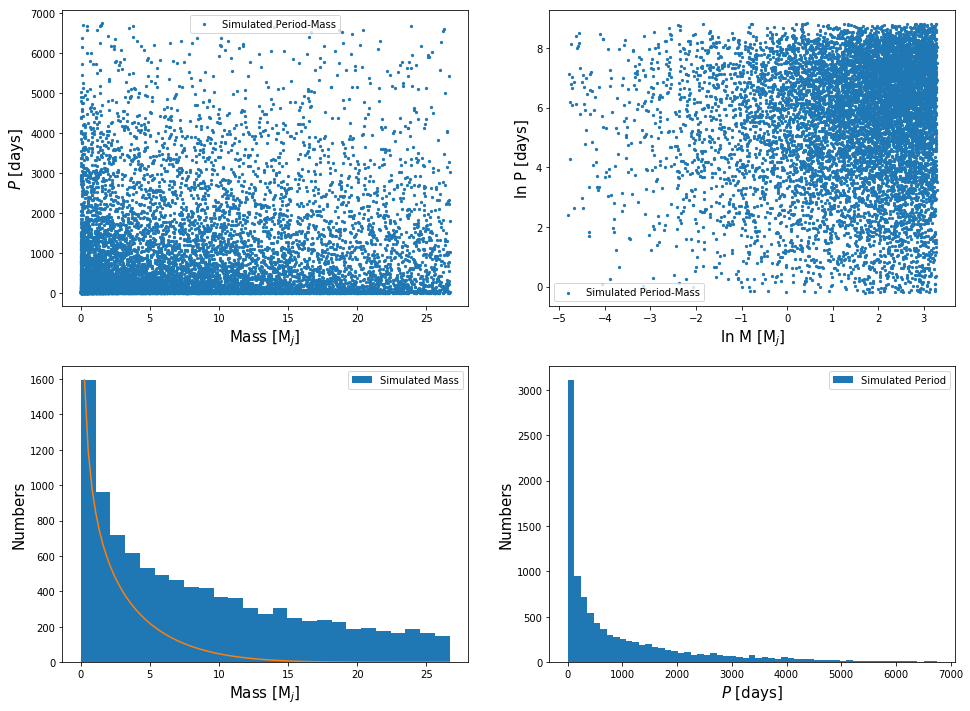

In [93]:
#values, bins, _ = plt.hist(M, bins = 'auto')
#area = sum(np.diff(bins)*values)
#print(area)

def Distribution(x, alpha, beta, c, d):
    
    B = 1.0 / beta_func(alpha, beta)
    S = (x - c)**(alpha - 1.0) * (d - x)**(beta - 1.0)
    D = (d - c)**(alpha + beta - 1.0)
    
    return B*S / D

Mass_range = np.linspace(0.008, 26.7, 100)
M_pdf = Distribution(Mass_range, 0.6524, 5.9076, 0.008, 26.7)
#plt.plot(Mass_range, M_pdf)

#alpha = 0.6524
#beta = 5.9076
#B = beta_func(alpha, beta)
#A = gamma(alpha)*gamma(beta) / gamma(alpha + beta)
#print(A, B)

fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize=(16,12), nrows=2, ncols=2)

axA.scatter(M, P, label = 'Simulated Period-Mass', s = 5)
axA.set_ylabel('$P$ [days]', size = 15)
axA.set_xlabel('Mass [M$_j$]', size = 15)
axA.legend()

axB.scatter(np.log(M), np.log(P), label = 'Simulated Period-Mass', s = 5)
axB.set_ylabel('$\ln$ P [days]', size = 15)
axB.set_xlabel('$\ln$ M [M$_j$]', size = 15)
axB.legend()

axC.hist(M, bins = 'auto', label = 'Simulated Mass' );
axC.plot(Mass_range, 4000*M_pdf, '-')
#axC.set_ylim(0, 1400)
axC.set_ylabel('Numbers', size = 15)
axC.set_xlabel('Mass [M$_j$]', size = 15)
axC.legend()

axD.hist(P, bins = 'auto', label = 'Simulated Period' );
axD.set_xlabel('$P$ [days]', size = 15)
axD.set_ylabel('Numbers', size = 15)
axD.legend()

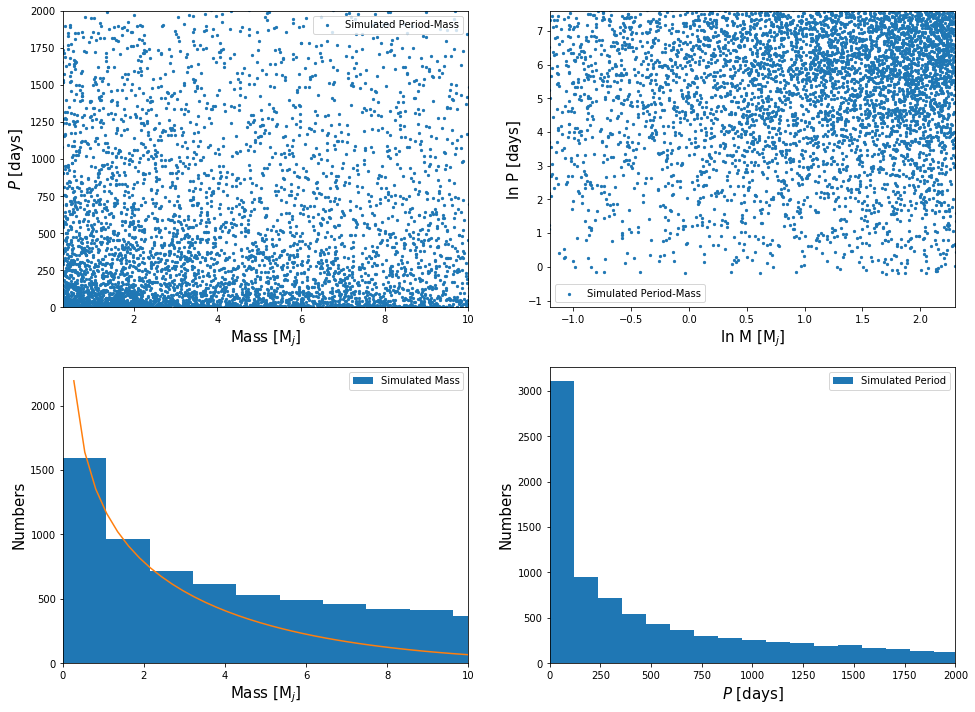

In [101]:
#Zoom-in

fig, ((axA, axB), (axC, axD)) = plt.subplots(figsize=(16,12), nrows=2, ncols=2)

axA.scatter(M, P, label = 'Simulated Period-Mass', s = 5)
axA.set_ylabel('$P$ [days]', size = 15)
axA.set_xlabel('Mass [M$_j$]', size = 15)
axA.set_xlim(0.3, 10)
axA.set_ylim(0, 2000)
axA.legend()

axB.scatter(np.log(M), np.log(P), label = 'Simulated Period-Mass', s = 5)
axB.set_ylabel('$\ln$ P [days]', size = 15)
axB.set_xlabel('$\ln$ M [M$_j$]', size = 15)
axB.set_xlim(np.log(0.3), np.log(10))
axB.set_ylim(np.log(0.3), np.log(2000))
axB.legend()

axC.hist(M, bins = 'auto', label = 'Simulated Mass' );
axC.set_ylabel('Numbers', size = 15)
axC.set_xlabel('Mass [M$_j$]', size = 15)
axC.plot(Mass_range, 5500*M_pdf, '-')
axC.set_xlim(0, 10)
axC.legend()

axD.hist(P, bins = 'auto', label = 'Simulated Period' );
axD.set_xlabel('$P$ [days]', size = 15)
axD.set_ylabel('Numbers', size = 15)
axD.set_xlim(0, 2000)
axD.legend()

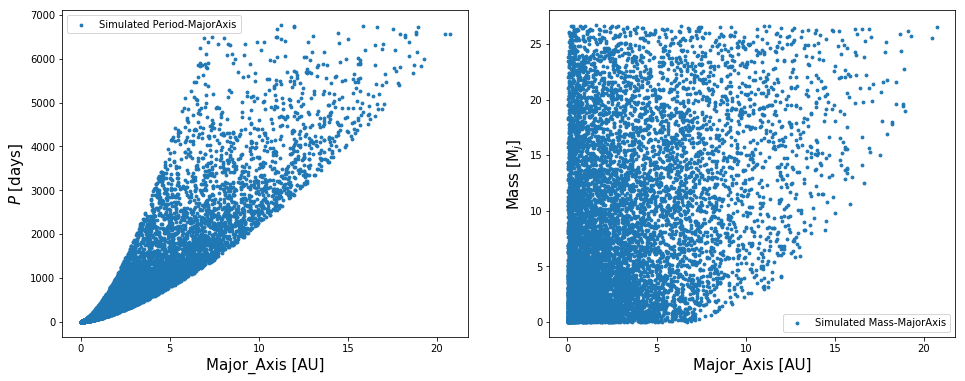

In [6]:
G = 2.959e-4 # AU^3 / Msun day^2

def MajorAxis(M, m, P):
    return (G * (M + m) / (4.0*np.pi**2))**(1.0/3.0) * P**(2.0/3.0)

Major_axis = []
for i in range(len(M)):
    Major_axis.append(MajorAxis(1.0, M[i], P[i]))
    
    
fig, ((axA, axB)) = plt.subplots(figsize=(16,6), nrows=1, ncols=2)

axA.scatter(Major_axis, P, label='Simulated Period-MajorAxis', s = 8)
axA.set_ylabel('$P$ [days]', size = 15)
axA.set_xlabel('Major_Axis [AU]', size = 15)
axA.legend()

axB.scatter(Major_axis, M, label='Simulated Mass-MajorAxis', s = 8)
axB.set_ylabel('Mass [M$_j$]', size = 15)
axB.set_xlabel('Major_Axis [AU]', size = 15)
axB.legend()

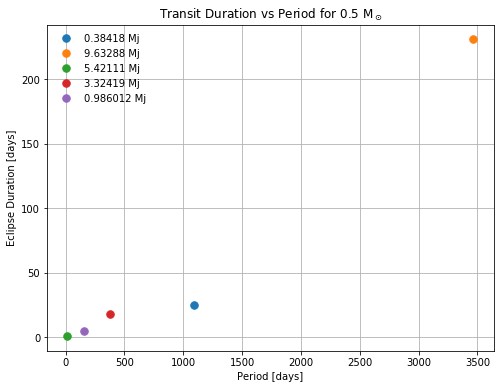

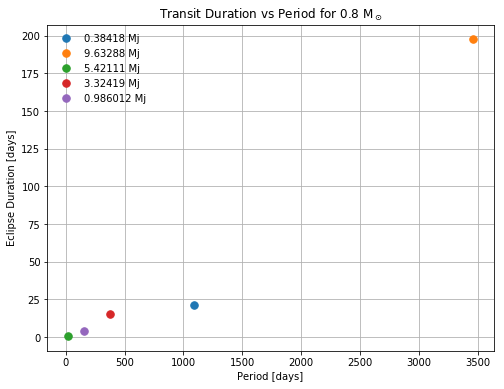

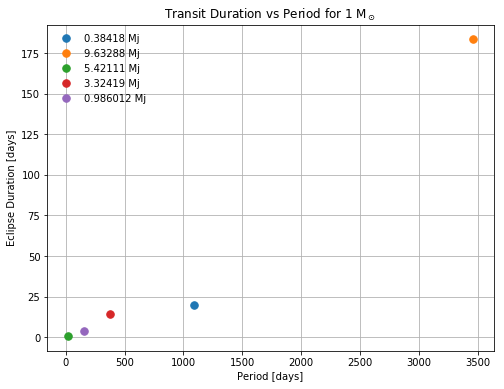

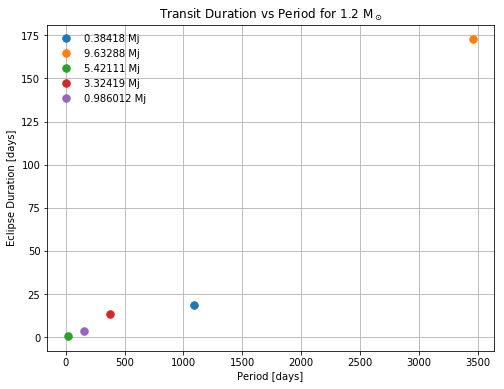

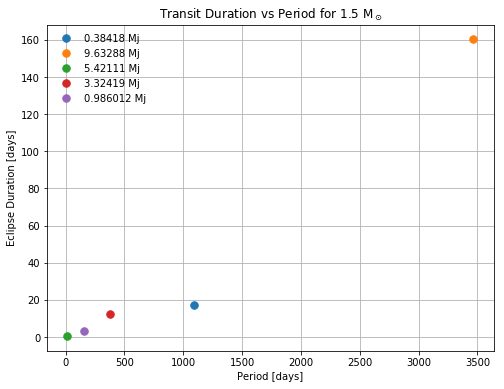

In [17]:
Planet_mass = np.array([M[0], M[1], M[2], M[3], M[4]])
Period      = np.array([P[0], P[1], P[2], P[3], P[4]])
Mass_star   = np.array([0.5, 0.8, 1.0, 1.2, 1.5])
#print('Mass(M_jupiter) = %1.2f Period(days) = %4.2f'%(Planet_mass, Period))
def Eclipsing_Time(M, m, P, epsilon):
    return P * (epsilon / np.pi) * (m / (2.0*M))**(1.0/3.0)

Masses = c.GM_jup/c.GM_sun              #From jupiter mass to solar mass

epsilon     = 0.3                       #Quillen & Trilling, 1998

for j in range(len(Mass_star)):
    plt.figure()
    plt.figure(figsize = (8,6))
    for i in range(len(Planet_mass)):
        plt.plot(Period[i], Eclipsing_Time(Mass_star[j], Planet_mass[i]*Masses, Period[i], 1), '.', ms = 15, label = r'%g Mj'%(Planet_mass[i]))
    plt.legend(frameon = False, loc = 'best')
    plt.title(r'Transit Duration vs Period for %g M$_\odot$'%(Mass_star[j]))
    plt.xlabel('Period [days]')
    plt.ylabel('Eclipse Duration [days]')
    plt.grid()
    plt.savefig("Eclipse_Period_%d"%(j))